# LAB #1

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tf.__version__

'1.15.0'

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets("data/MNIST/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
len(data.train.images) # Train image count

55000

In [5]:
len(data.test.images) # Test image count

10000

In [6]:
data.test.labels[0:5, :]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [0]:
data.test.cls = np.array([label.argmax() for label in data.test.labels])

In [8]:
data.test.cls[0:5]

array([7, 2, 1, 0, 4])

### Data dimensions

In [0]:
# We know that MNIST images are 28 pixels in each dimension.
img_size = 28

# Images are stored in one-dimensional arrays of this length.
img_size_flat = img_size * img_size

# Tuple with height and width of images used to reshape arrays.
img_shape = (img_size, img_size)

# Number of classes, one class for each of 10 digits.
num_classes = 10

### Placeholder variables

In [0]:
x = tf.placeholder(tf.float32, [None, img_size_flat])
#x_1 = tf.placeholder(tf.float32, [None, img_size_flat])

In [0]:
y_true = tf.placeholder(tf.float32, [None, num_classes])

In [0]:
y_true_cls = tf.placeholder(tf.int64, [None])

### Variables to be optimized

In [0]:
weights = tf.Variable(tf.random.uniform([img_size_flat, num_classes]))
weights_1 = tf.Variable(tf.random.uniform([img_size_flat, img_size_flat]))

In [0]:
biases = tf.Variable(tf.zeros([num_classes]))
biases_1 = tf.Variable(tf.zeros([img_size_flat]))

### Model

In [0]:
x_1 =  tf.matmul(x, weights_1) + biases_1
#x_1 = tf.nn.relu(x_1)
logits = tf.matmul(x_1, weights) + biases

In [0]:
y_pred = tf.nn.softmax(logits)

In [0]:
y_pred_cls = tf.argmax(y_pred, axis=1)

### Cost-function to be optimized

In [18]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits,
                                                        labels=y_true)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
cost = tf.reduce_mean(cross_entropy)

### Optimization method

In [0]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

### Performance measures

In [0]:
correct_prediction = tf.equal(y_pred_cls, y_true_cls)

In [0]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

## TensorFlow Run

In [0]:
session = tf.Session()

In [0]:
session.run(tf.global_variables_initializer())

### Train

In [0]:
batch_size = 1000

In [0]:
def train(num_iterations):
    #accuracy_array = []
    for i in range(num_iterations):
        # Get a batch of training examples.
        # x_batch now holds a batch of images and
        # y_true_batch are the true labels for those images.
        x_batch, y_true_batch = data.train.next_batch(batch_size)
        
        # Put the batch into a dict with the proper names
        # for placeholder variables in the TensorFlow graph.
        # Note that the placeholder for y_true_cls is not set
        # because it is not used during training.
        feed_dict_train = {x: x_batch,
                           y_true: y_true_batch}

        # Run the optimizer using this batch of training data.
        # TensorFlow assigns the variables in feed_dict_train
        # to the placeholder variables and then runs the optimizer.
        session.run(optimizer, feed_dict=feed_dict_train)
        #accuracy_array.append(accuracy)
    #return accuracy_array

### Test

In [0]:
feed_dict_test = {x: data.test.images,
                  y_true: data.test.labels,
                  y_true_cls: data.test.cls}

In [0]:
def print_accuracy():
    
    # Run the model to get predictions for test data
    cls_pred = session.run(y_pred_cls, feed_dict=feed_dict_test)
    
    # Get true labels
    cls_true = data.test.cls
    
    # Calculate the difference betweeb predictions and true labels
    correct_prediction = np.equal(cls_pred, cls_true)
    
    # Calculate the total accuracy
    acc = np.mean(correct_prediction)

    # Print the accuracy.
    print("Accuracy on test-set: {0:.1%}".format(acc))

ACCURACY PRINT

Final Accuracy is :  0.9112


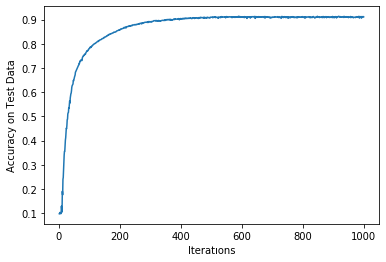

In [29]:

acc_array = []
for k in np.arange(1000) :
  feed_dict_test = {x: data.test.images,
  y_true: data.test.labels,
  y_true_cls: data.test.cls}
  train(num_iterations = 1)
      # Run the model to get predictions for test data
  cls_pred = session.run(y_pred_cls, feed_dict=feed_dict_test)
    
    # Get true labels
  cls_true = data.test.cls
    
    # Calculate the difference betweeb predictions and true labels
  correct_prediction = np.equal(cls_pred, cls_true)
    
    # Calculate the total accuracy
  acc = np.mean(correct_prediction)
  acc_array.append(acc)
  
a = np.linspace (1,1000,1000)
plt.plot(a,acc_array)
plt.xlabel("Iteratıons")
plt.ylabel("Accuracy on Test Data")
print("Final Accuracy is : ", acc_array[-1])
plt.show()
  

In [0]:
session.close()

## References

[1] [Magnus Erik Hvass Pedersen](http://www.hvass-labs.org/)